# 1. 패키지 설치 및 불러오기

In [ ]:

# 1. 라이브러리 임포트

%pip install yfinance  # (Colab 등에서 필요 시)
%pip install tensorflow
%pip install matplot
import yfinance as yf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

import random




[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#3. 데이터 수집 (주가 + 임의 감정 점수)
import yfinance as yf

ticker = 'AAPL'  # 애플 예시
start_date = '2015-01-01'
end_date = '2025-01-01'

df = yf.download(ticker, start=start_date, end=end_date)
# df: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
df.dropna(inplace=True)
# 감정분석 값 추가 (기본값 = 0)
df['Sentiment'] = 0



YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
###################################
# 4. 멀티피처 (Close, Volume, Sentiment) + 정규화
###################################
feature_cols = ['Close', 'Volume', 'Sentiment']
data = df[feature_cols].copy()

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# DataFrame 형태로 다시 저장(편의용)
scaled_df = pd.DataFrame(scaled_data, columns=feature_cols, index=df.index)



X_all shape: (2486, 30, 3)
y_all shape: (2486,)

[Split 0] Training on 1988 samples; Testing from 2023-01-09 00:00:00 to 2023-09-06 00:00:00
Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0186
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0013
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0013
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0012
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0012
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0010
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0010
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.2144e-04
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

[Split 1] Training on 2154 samples; Testing from 2023-09-07 00:00:00 to 2024-05-03 00:00:00
Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0236
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0021
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0018
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0015
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0014
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0012
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0013
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0011
Epoch 9/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0012
Epoch 10/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 9.9954e-04
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

[Split 2] Training on 2320 samples; Testing from 2024-05-06 00:00:00 to 2024-12-31 00:00:00
Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0344
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0024
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0024
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0020
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0019
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0016
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0014
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0014
Epoch 9/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0015
Epoch 10/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0013
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step
Split 0 | Test Range: 2023-01-09 00:00:00 ~ 2023-09-06 00:00:00 | RMSE: 0.0281
Split 1 | Test Range: 2023-09-07 00:00:00 ~ 2024-05-03 00:00:00 | RMSE: 0.0274
Split 2 | Test Range: 2024-05-06 00:00:00 ~ 2024-12-31 00:00:00 | RMSE: 0.0432
Average RMSE across splits: 0.0329
Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0094 - val_loss: 8.7011e-04
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.1863e-04 - val_loss: 0.0016
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.7367e-04 - val_loss: 7.5837e-04
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.3651e-04 - val_loss: 0.0010
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.6218e-04 - val_loss: 8.8685e-04
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.7602e-04 - val_loss: 0.0017
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.7310e-04 - val_loss: 6.8204e-04
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.4046e-04 - val_loss: 6.7868e-04
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.2712e-04 - val_loss: 6.5151e-04
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.7667e-04 - val_loss: 7.5792e-04
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[Simple final split] RMSE: 0.0357


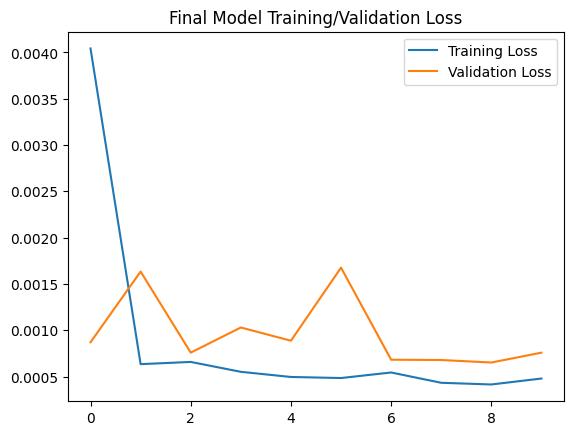

In [ ]:
###################################
# 5. 시계열 윈도우 생성 함수
###################################
def create_sequences_multi_features(scaled_df, window_size=7, target_col='Close'):
    """
    window_size일 동안의 [Close,Volume,Sentiment]를 보고 
    다음 날(target_col)의 값을 예측하는 구조.
    """
    X_list = []
    y_list = []
    dates = scaled_df.index
    date_list = []

    target_idx = scaled_df.columns.get_loc(target_col)

    for i in range(len(scaled_df) - window_size):
        X_window = scaled_df.iloc[i : i + window_size].values
        y_value = scaled_df.iloc[i + window_size, target_idx]
        
        X_list.append(X_window)
        y_list.append(y_value)
        date_list.append(dates[i + window_size])  # 이 샘플의 '정답' 날짜(예: 예측 시점)

    X_arr = np.array(X_list)
    y_arr = np.array(y_list)
    return X_arr, y_arr, date_list

window_size = 30
X_all, y_all, date_all = create_sequences_multi_features(scaled_df, window_size=window_size, target_col='Close')

print("X_all shape:", X_all.shape)  # 예: (N, 30, 3)
print("y_all shape:", y_all.shape)  # 예: (N,)

###################################
# 6. Walk-Forward Validation 설정
###################################
def walk_forward_validation(X, y, dates, train_ratio=0.8, n_splits=3, window_size=30):
    """
    전체 데이터의 80%까지를 초기 Train으로 하고,
    이후를 n_splits 등분하여 Expanding Window 방식으로 테스트하는 예시입니다.
    각 분할에서 모델 학습 시, 에포크마다 loss가 출력됩니다.
    """
    n_total = len(X)
    n_initial_train = int(n_total * train_ratio)

    # 초반 80%를 기본 훈련 세트로 하고, 나머지 20%를 n_splits 구간으로 나눔
    X_train_initial = X[:n_initial_train]
    y_train_initial = y[:n_initial_train]
    dates_train_initial = dates[:n_initial_train]

    X_test_part = X[n_initial_train:]
    y_test_part = y[n_initial_train:]
    dates_test_part = dates[n_initial_train:]
    
    # n_splits로 나눔
    chunk_size = len(X_test_part) // n_splits

    results = []
    start_idx = 0
    
    # Expanding window 방식 (각 분할마다 누적된 데이터로 학습)
    for split_idx in range(n_splits):
        end_idx = start_idx + chunk_size
        if split_idx == n_splits - 1:  # 마지막 구간 처리
            end_idx = len(X_test_part)

        # 현재 테스트 구간
        X_test_current = X_test_part[start_idx:end_idx]
        y_test_current = y_test_part[start_idx:end_idx]
        dates_test_current = dates_test_part[start_idx:end_idx]

        # Train 데이터: 초기 Train + 지금까지의 Test 일부
        X_train_current = np.concatenate([X_train_initial, X_test_part[:start_idx]], axis=0)
        y_train_current = np.concatenate([y_train_initial, y_test_part[:start_idx]], axis=0)

        # 모델 학습 (verbose=1로 설정하여 각 에포크의 손실을 출력)
        # 수정: X_all 대신 X_train_current의 피처 수 사용
        model = build_lstm_model(input_shape=(window_size, X_train_current.shape[2]))
        print(f"\n[Split {split_idx}] Training on {len(X_train_current)} samples; Testing from {dates_test_current[0]} to {dates_test_current[-1]}")
        history = model.fit(
            X_train_current, y_train_current,
            epochs=10, batch_size=32, verbose=1
        )

        # 예측 및 RMSE 계산
        preds = model.predict(X_test_current)
        mse = mean_squared_error(y_test_current, preds)
        rmse = sqrt(mse)

        results.append({
            'split': split_idx,
            'test_range': (dates_test_current[0], dates_test_current[-1]),
            'rmse': rmse,
            'history': history  # 원한다면 각 분할의 history도 저장 가능
        })

        start_idx = end_idx  # 다음 구간으로 이동

    return results

###################################
# 7. LSTM(2레이어) 모델 구성 함수
###################################
def build_lstm_model(input_shape):
    """
    2레이어 LSTM(64, 32) + Dropout(0.2) + Dense(1)
    """
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(32, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

###################################
# 8. Walk-Forward Validation 실행
###################################
results = walk_forward_validation(X_all, y_all, date_all, train_ratio=0.8, n_splits=3)

###################################
# 9. 결과 분석
###################################
for r in results:
    print(f"Split {r['split']} | Test Range: {r['test_range'][0]} ~ {r['test_range'][1]} | RMSE: {r['rmse']:.4f}")

avg_rmse = np.mean([r['rmse'] for r in results])
print(f"Average RMSE across splits: {avg_rmse:.4f}")

###################################
# 10. 최종 모델 학습 (단순 분할)
# 전체 데이터의 80%를 Train, 나머지 20%를 Test로 단순 분할
simple_split = int(len(X_all) * 0.8)
X_train_simple, X_test_simple = X_all[:simple_split], X_all[simple_split:]
y_train_simple, y_test_simple = y_all[:simple_split], y_all[simple_split:]

model_final = build_lstm_model((window_size, X_all.shape[2]))
# validation_split=0.2를 추가하여, 학습 과정 중 검증 손실을 기록
history_final = model_final.fit(X_train_simple, y_train_simple, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

preds_simple = model_final.predict(X_test_simple)
rmse_simple = sqrt(mean_squared_error(y_test_simple, preds_simple))
print(f"[Simple final split] RMSE: {rmse_simple:.4f}")

# 학습 성능 시각화 (최종 모델)
plt.plot(history_final.history['loss'], label='Training Loss')
plt.plot(history_final.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Final Model Training/Validation Loss")
plt.show()

In [ ]:
def predict_future(model, last_window, steps):
    """
    model: 학습된 모델 (예: model_final)
    last_window: 마지막 시계열 윈도우 데이터, shape = (window_size, feature 수)
    steps: 예측할 미래 시점의 수 (예: 5일)
    
    반환: 예측된 미래 'Close' 값들의 배열 (정규화된 값)
    """
    predictions = []
    # 현재 윈도우를 복사 (매 반복마다 업데이트됨)
    current_window = last_window.copy()
    
    for i in range(steps):
        # 현재 윈도우에 대해 모델 예측 (입력 shape: (1, window_size, feature 수))
        current_window_expanded = np.expand_dims(current_window, axis=0)
        pred_norm = model.predict(current_window_expanded)[0, 0]  # 예측된 종가 (정규화된 값)
        predictions.append(pred_norm)
        
        # 미래의 다른 피처(Volume, Sentiment)는 최근 관측치를 그대로 사용
        # 새 행: 예측된 종가 + 마지막 행의 Volume, Sentiment 값 복사
        new_row = current_window[-1].copy()
        new_row[0] = pred_norm  # 종가는 예측값으로 대체
        
        # 슬라이딩 윈도우 업데이트: 기존 윈도우의 첫 행 제거하고 새 행 추가
        current_window = np.vstack([current_window[1:], new_row])
    
    return np.array(predictions)

# 마지막 윈도우 데이터 (X_all에서 가장 마지막 샘플)
last_window = X_all[-1]  # shape: (window_size, 3)

# 예측할 미래 시점의 수 (예: 앞으로 5일)
steps = 5
future_predictions = predict_future(model_final, last_window, steps)
print("Future predicted normalized 'Close' values:", future_predictions)

# 만약 원래 스케일(예: 달러 단위)로 변환하고 싶다면,
# 예측값 배열을 [예측값, dummy, dummy] 형식으로 만들어 scaler.inverse_transform을 적용할 수 있습니다.
# 예를 들어:
dummy = np.zeros_like(future_predictions)
pred_array = np.column_stack((future_predictions, dummy, dummy))
# scaled_df에서 사용한 scaler를 적용 (단, 이 방법은 예시이며 실제로는 적절한 값 대체가 필요합니다)
preds_original = scaler.inverse_transform(pred_array)[:, 0]
print("Future predicted 'Close' values (original scale):", preds_original)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Future predicted normalized 'Close' values: [0.9048577  0.90369534 0.90043795 0.89584017 0.8903984 ]
Future predicted 'Close' values (original scale): [236.08585 235.80913 235.03368 233.93912 232.64365]


Train indices: 2476 samples
Test indices: 5 samples
Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0225 - val_loss: 0.0011
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0014 - val_loss: 8.2894e-04
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0011 - val_loss: 8.1614e-04
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 9.8763e-04 - val_loss: 0.0016
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 9.7393e-04 - val_loss: 7.9943e-04
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0010 - val_loss: 7.5418e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
[Custom Split Prediction] RMSE: 0.0618
Predicted 'Close' values (original scale): [239.05554943 2

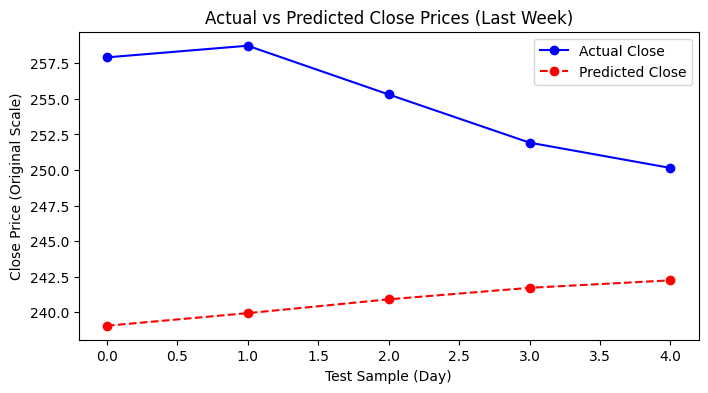

In [ ]:
import pandas as pd
from datetime import timedelta

# 1. 데이터의 날짜 정보를 이용해 훈련/테스트 인덱스 선택
# date_all는 create_sequences_multi_features 함수에서 반환된 날짜 리스트 (pandas DatetimeIndex 혹은 리스트)
last_date = date_all[-1]  # 전체 시퀀스의 마지막 날짜

# "2주 전"까지의 데이터를 훈련으로 사용하기 위한 종료 날짜: 
# 즉, 2주 전 이전의 시퀀스만 훈련에 포함
train_end_date = last_date - pd.Timedelta(weeks=2)

# 테스트 데이터는 "마지막 주"에 해당하는 시퀀스
test_start_date = last_date - pd.Timedelta(weeks=1)  # 마지막 주 시작일
test_end_date = last_date  # 마지막 날짜

# 훈련 인덱스: 날짜가 train_end_date보다 이전인 경우 선택
train_indices = [i for i, d in enumerate(date_all) if d < train_end_date]
# 테스트 인덱스: 날짜가 test_start_date와 test_end_date 사이인 경우 선택
test_indices = [i for i, d in enumerate(date_all) if (d >= test_start_date) and (d <= test_end_date)]

print(f"Train indices: {len(train_indices)} samples")
print(f"Test indices: {len(test_indices)} samples")

# 2. 훈련/테스트 데이터 추출
X_train_custom = X_all[train_indices]
y_train_custom = y_all[train_indices]
X_test_custom = X_all[test_indices]
y_test_custom = y_all[test_indices]

# 3. 모델 구성, 학습 및 예측 (이미 정의된 build_lstm_model 사용)
model_custom = build_lstm_model(input_shape=(window_size, X_all.shape[2]))

# 훈련: validation_split을 사용할 수도 있습니다.
history_custom = model_custom.fit(X_train_custom, y_train_custom, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# 4. 테스트 데이터에 대한 예측
preds_custom = model_custom.predict(X_test_custom)

# 5. 성능 평가: RMSE 계산 (정규화된 값 기준)
rmse_custom = sqrt(mean_squared_error(y_test_custom, preds_custom))
print(f"[Custom Split Prediction] RMSE: {rmse_custom:.4f}")

# 6. (선택) 예측값을 원래 스케일로 변환하고 싶다면:
dummy = np.zeros((preds_custom.shape[0], 2))  # Volume, Sentiment 자리에 채워 넣을 더미 값
pred_array = np.concatenate((preds_custom, dummy), axis=1)
preds_original = scaler.inverse_transform(pred_array)[:, 0]
print("Predicted 'Close' values (original scale):", preds_original)

# 테스트 데이터의 실제 y값(정규화된 값)을 원본 스케일로 변환
# 여기서 y_test_custom은 정규화된 타깃 값입니다.
dummy = np.zeros((len(y_test_custom), 2))  # 'Volume', 'Sentiment' 자리에 들어갈 더미 값 (0)
y_test_array = np.column_stack((y_test_custom, dummy))
y_test_original = scaler.inverse_transform(y_test_array)[:, 0]

# 예측된 정규화된 y값(preds_custom)을 이미 원본 스케일로 변환한 preds_original을 사용합니다.
# preds_original는 [230.95845902, 231.90000591, 232.90456854, 233.68290735, 234.17207753]로 출력됨

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(range(len(y_test_original)), y_test_original, marker='o', linestyle='-', color='blue', label='Actual Close')
plt.plot(range(len(preds_original)), preds_original, marker='o', linestyle='--', color='red', label='Predicted Close')
plt.xlabel('Test Sample (Day)')
plt.ylabel('Close Price (Original Scale)')
plt.title('Actual vs Predicted Close Prices (Last Week)')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Future predicted normalized 'Close' value: 0.8725282
Future predicted 'Close' value (original scale): 228.38944289925647
Actual 'Close' value on 2025-03-14: Ticker
AAPL    209.679993
Name: 2025-03-13 00:00:00, dtype: float64



/var/folders/fd/p8gl394x5wjgxs6cdb2744br0000gn/T/ipykernel_12288/76737322.py:46: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.bar(["Predicted", "Actual"], [float(pred_future_original), float(actual_close)], color=["red", "blue"])


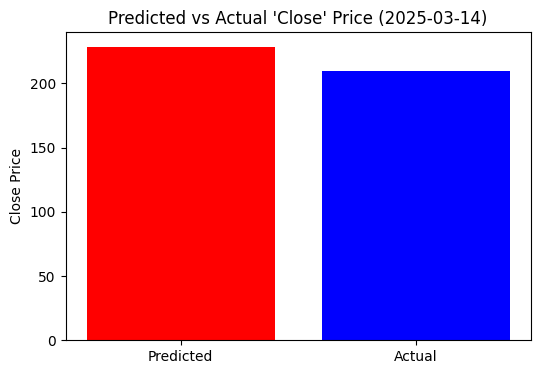

In [ ]:
# 미래 데이터를 호출 (2025-03-10 ~ 2025-03-14)
future_start = "2025-03-10"
future_end = "2025-03-14"
df_future = yf.download("AAPL", start=future_start, end=future_end)
df_future.dropna(inplace=True)

# Sentiment 값은 0으로 고정
df_future['Sentiment'] = 0.0

# 동일한 피처 선택 및 정규화 (이미 학습 시 사용한 scaler 사용)
future_features = df_future[['Close', 'Volume', 'Sentiment']].copy()
scaled_future = scaler.transform(future_features)
scaled_future_df = pd.DataFrame(scaled_future, columns=future_features.columns, index=df_future.index)

# 만약 미래 데이터의 길이가 window_size보다 작다면, 과거 데이터의 마지막 일부를 결합합니다.
if len(scaled_future_df) < window_size:
    needed = window_size - len(scaled_future_df)
    # 과거 데이터(scaled_df)의 마지막 'needed' 행을 가져옵니다.
    past_data = scaled_df.iloc[-needed:].values
    # 미래 데이터의 모든 행을 가져와서 결합하여 complete_window 구성
    complete_window = np.concatenate([past_data, scaled_future_df.values], axis=0)
else:
    complete_window = scaled_future_df.iloc[-window_size:].values

# complete_window의 shape: (window_size, 3)
# 모델 입력 형태로 변환: (1, window_size, 3)
complete_window_expanded = np.expand_dims(complete_window, axis=0)

# 학습된 최종 모델(model_final)을 사용해 예측
future_pred_norm = model_final.predict(complete_window_expanded)[0,0]  # 정규화된 예측 값
print("Future predicted normalized 'Close' value:", future_pred_norm)

# 원래 스케일로 변환 (다른 피처는 더미값 사용)
dummy_future = np.zeros((1, 2))
pred_array_future = np.concatenate((np.array([[future_pred_norm]]), dummy_future), axis=1)
pred_future_original = scaler.inverse_transform(pred_array_future)[0,0]
print("Future predicted 'Close' value (original scale):", pred_future_original)

# 실제 미래 데이터의 마지막 날(예: 2025-03-14)의 실제 종가와 비교
if df_future.shape[0] > 0:
    actual_close = df_future['Close'].iloc[-1]
    print("Actual 'Close' value on 2025-03-14:", actual_close)

# 예측값과 실제값 시각화
plt.figure(figsize=(6,4))
plt.bar(["Predicted", "Actual"], [float(pred_future_original), float(actual_close)], color=["red", "blue"])
plt.ylabel("Close Price")
plt.title("Predicted vs Actual 'Close' Price (2025-03-14)")
plt.show()

[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Future predicted normalized 'Close' value: 0.85052013
Future predicted 'Close' value (original scale): 223.15018248764503
Actual 'Close' value on 2025-03-14: Ticker
AAPL    209.679993
Name: 2025-03-13 00:00:00, dtype: float64



/var/folders/fd/p8gl394x5wjgxs6cdb2744br0000gn/T/ipykernel_12288/2986506241.py:72: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.bar(["Predicted", "Actual"], [float(pred_future_original), float(actual_close)], color=["red", "blue"])


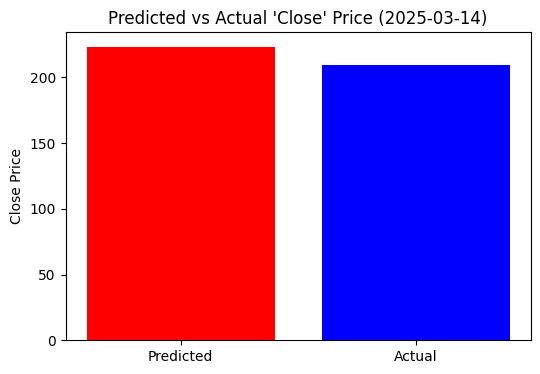

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.metrics import mean_squared_error
from math import sqrt

# 가정: 이전 단계에서 생성한 'scaler', 'scaled_df', 'window_size', 'model_final' 등이 이미 정의되어 있음.
# 예를 들어, 'scaled_df'는 [Close, Volume, Sentiment] 컬럼을 MinMaxScaler로 정규화한 DataFrame입니다.

###################################
# 미래 데이터를 호출 (2025-03-10 ~ 2025-03-14)
###################################
future_start = "2025-03-01"
future_end = "2025-03-14"
df_future = yf.download("AAPL", start=future_start, end=future_end)
df_future.dropna(inplace=True)

# Sentiment 값은 0으로 고정 (모델에 영향을 주지 않도록)
df_future['Sentiment'] = 0.0

# 동일한 피처 선택 및 정규화 (이미 학습에 사용한 scaler 사용)
future_features = df_future[['Close', 'Volume', 'Sentiment']].copy()
scaled_future = scaler.transform(future_features)
scaled_future_df = pd.DataFrame(scaled_future, columns=future_features.columns, index=df_future.index)

###################################
# 윈도우 크기보다 미래 데이터가 짧은 경우, 과거 데이터와 결합하여 complete_window 구성
###################################
if len(scaled_future_df) < window_size:
    needed = window_size - len(scaled_future_df)
    # 과거 데이터(scaled_df)는 이전에 생성한 정규화된 DataFrame (예: 전체 데이터)
    past_data = scaled_df.iloc[-needed:].values  # 마지막 'needed' 행을 가져옴
    # 미래 데이터의 모든 행과 결합하여 complete_window 생성
    complete_window = np.concatenate([past_data, scaled_future_df.values], axis=0)
else:
    complete_window = scaled_future_df.iloc[-window_size:].values

# complete_window의 shape는 (window_size, 3)
complete_window_expanded = np.expand_dims(complete_window, axis=0)  # 모델 입력: (1, window_size, 3)

###################################
# 학습된 최종 모델(model_final)을 사용해 예측
###################################
future_pred_norm = model_final.predict(complete_window_expanded)[0, 0]  # 정규화된 예측값
print("Future predicted normalized 'Close' value:", future_pred_norm)

###################################
# 정규화된 예측값을 원래 스케일로 변환 (나머지 피처는 더미값 사용)
###################################
dummy_future = np.zeros((1, 2))  # Volume, Sentiment 자리에 0 채움
pred_array_future = np.concatenate((np.array([[future_pred_norm]]), dummy_future), axis=1)
pred_future_original = scaler.inverse_transform(pred_array_future)[0, 0]
print("Future predicted 'Close' value (original scale):", pred_future_original)

###################################
# 실제 미래 데이터의 마지막 날(예: 2025-03-14)의 실제 종가와 비교
###################################
if df_future.shape[0] > 0:
    actual_close = df_future['Close'].iloc[-1]
    print("Actual 'Close' value on 2025-03-14:", actual_close)
else:
    actual_close = None

###################################
# 예측값과 실제값 시각화
###################################
if actual_close is not None:
    plt.figure(figsize=(6, 4))
    # 두 값 모두 스칼라로 변환 (float)
    plt.bar(["Predicted", "Actual"], [float(pred_future_original), float(actual_close)], color=["red", "blue"])
    plt.ylabel("Close Price")
    plt.title("Predicted vs Actual 'Close' Price (2025-03-14)")
    plt.show()
else:
    print("실제 미래 데이터가 없습니다.")

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt

# RMSE 계산 함수 정의
def calculate_rmse(Y_true, Y_pred):
    return np.sqrt(mean_squared_error(Y_true, Y_pred))

# MAE 계산 함수 정의 (sklearn 사용)
def calculate_mae(Y_true, Y_pred):
    return mean_absolute_error(Y_true, Y_pred)

# MAPE 계산 함수 정의
def calculate_mape(Y_true, Y_pred):
    y_true = np.array(Y_true)
    y_pred = np.array(Y_pred)
    # 실제값이 0이면 작은 값으로 대체하여 계산
    y_true_adj = np.where(y_true == 0, 0.001, y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true_adj)) * 100

# 결과 저장을 위한 빈 딕셔너리 초기화
results = {
    'Company': [],
    'RMSE (no sentiment)': [],
    'RMSE (with sentiment)': [],
}

# 기존 결과 파일이 있는지 확인하고, 있다면 불러오기
results_file_path = "/content/drive/MyDrive/LSTM_results.csv"
if os.path.isfile(results_file_path):
    existing_results = pd.read_csv(results_file_path)
else:
    existing_results = None

# (예시) 여러 종목에 대한 Ticker를 담은 딕셔너리
stock_dict = {
    "Apple": "AAPL",
    "Microsoft": "MSFT"
}

# 예시: 2020-01-01 ~ 2023-01-01 구간
start_date = "2000-01-01"
end_date   = "2025-01-01"

#----------------------------------------------
# LSTM 윈도우 구성 함수
#----------------------------------------------
def create_dataset(dataset, seq_size):
    X, Y = [], []
    for i in range(len(dataset) - seq_size - 1):
        X.append(dataset[i:(i + seq_size)])
        Y.append(dataset[i + seq_size])
    return np.array(X), np.array(Y)

#----------------------------------------------
# 각 종목별로 학습/예측 수행
#----------------------------------------------
for company_name, company_code in stock_dict.items():
    #==============================================
    # 1) "No Sentiment": 야후 파이낸스 데이터만
    #==============================================
    df_no_sentiment = yf.download(company_code, start=start_date, end=end_date, progress=False)
    df_no_sentiment.reset_index(inplace=True)
    df_no_sentiment = df_no_sentiment[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
    df_no_sentiment.fillna(method='ffill', inplace=True)

    #==============================================
    # 2) "With Sentiment": 0으로 고정된 컬럼 추가
    #==============================================
    df_with_sentiment = df_no_sentiment.copy()
    df_with_sentiment["Sentiment"] = 0.0

    # 결과를 저장할 리스트
    rmse_results_no_sentiment = []
    rmse_results_with_sentiment = []

    seq_size = 10  # 시퀀스 길이

    #----------------------------------------------------------------
    # (A) No Sentiment 케이스
    #----------------------------------------------------------------
    # date 제외 -> ['Open','High','Low','Close','Volume']
    columns_no_sentiment = df_no_sentiment.columns[1:]
    data_no_sentiment = df_no_sentiment.iloc[:, 1:].values.astype(float)
    scaler_no_sentiment = MinMaxScaler(feature_range=(0, 1))
    scaled_data_no_sentiment = scaler_no_sentiment.fit_transform(data_no_sentiment)
    X, Y_data = create_dataset(scaled_data_no_sentiment, seq_size)

    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    Y_train, Y_test = Y_data[:train_size], Y_data[train_size:]

    model = Sequential()
    model.add(LSTM(50, return_sequences=True,
                   input_shape=(seq_size, len(columns_no_sentiment)),
                   kernel_regularizer=l2(1e-5)))
    model.add(Dropout(0.2))
    model.add(LSTM(50, kernel_regularizer=l2(1e-5)))
    model.add(Dropout(0.2))
    model.add(Dense(len(columns_no_sentiment)))
    model.compile(optimizer='adam', loss='mean_squared_error')

    def scheduler(epoch, lr):
        return lr * 0.99
    callback = LearningRateScheduler(scheduler)

    model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
              epochs=50, batch_size=32, callbacks=[callback], verbose=1)

    predictions = model.predict(X_test)
    rmse_no_sent = calculate_rmse(Y_test, predictions)
    mae_no_sent = calculate_mae(Y_test, predictions)
    mape_no_sent = calculate_mape(Y_test, predictions)
    rmse_results_no_sentiment.append(rmse_no_sent)

    print(f"\n{company_name} (No Sentiment) Metrics:")
    print("  RMSE: {:.4f}".format(rmse_no_sent))
    print("  MAE: {:.4f}".format(mae_no_sent))
    print("  MAPE: {:.2f}%".format(mape_no_sent))
    # 개별 샘플 오차 확인 (첫 5개 샘플)
    for i in range(5):
        error = Y_test[i] - predictions[i]
        print(f"  Sample {i+1} - Actual: {Y_test[i]}, Predicted: {predictions[i]}, Error: {error}")
    # ±5% 오차 내 정확도 계산
    threshold = 0.05
    relative_errors = np.abs((Y_test - predictions) / np.where(Y_test==0, 0.001, Y_test))
    accurate_ratio = np.mean(relative_errors < threshold)
    print("  Accuracy (within ±5% error): {:.2f}%".format(accurate_ratio * 100))

    #----------------------------------------------------------------
    # (B) With Sentiment 케이스 (Sentiment=0)
    #----------------------------------------------------------------
    # date 제외 -> ['Open','High','Low','Close','Volume','Sentiment']
    columns_with_sentiment = df_with_sentiment.columns[1:]
    data_with_sentiment = df_with_sentiment.iloc[:, 1:].values.astype(float)
    scaler_with_sentiment = MinMaxScaler(feature_range=(0, 1))
    scaled_data_with_sentiment = scaler_with_sentiment.fit_transform(data_with_sentiment)
    X_s, Y_data_s = create_dataset(scaled_data_with_sentiment, seq_size)

    train_size_s = int(len(X_s) * 0.8)
    X_train_s, X_test_s = X_s[:train_size_s], X_s[train_size_s:]
    Y_train_s, Y_test_s = Y_data_s[:train_size_s], Y_data_s[train_size_s:]

    model_s = Sequential()
    model_s.add(LSTM(50, return_sequences=True,
                     input_shape=(seq_size, len(columns_with_sentiment)),
                     kernel_regularizer=l2(1e-5)))
    model_s.add(Dropout(0.2))
    model_s.add(LSTM(50, kernel_regularizer=l2(1e-5)))
    model_s.add(Dropout(0.2))
    model_s.add(Dense(len(columns_with_sentiment)))
    model_s.compile(optimizer='adam', loss='mean_squared_error')

    model_s.fit(X_train_s, Y_train_s, validation_data=(X_test_s, Y_test_s),
                epochs=50, batch_size=32, callbacks=[callback], verbose=1)

    predictions_s = model_s.predict(X_test_s)
    rmse_with_sent = calculate_rmse(Y_test_s, predictions_s)
    mae_with_sent = calculate_mae(Y_test_s, predictions_s)
    mape_with_sent = calculate_mape(Y_test_s, predictions_s)
    rmse_results_with_sentiment.append(rmse_with_sent)

    print(f"\n{company_name} (With Sentiment=0) Metrics:")
    print("  RMSE: {:.4f}".format(rmse_with_sent))
    print("  MAE: {:.4f}".format(mae_with_sent))
    print("  MAPE: {:.2f}%".format(mape_with_sent))
    # 개별 샘플 오차 확인 (첫 5개 샘플)
    for i in range(5):
        error = Y_test_s[i] - predictions_s[i]
        print(f"  Sample {i+1} - Actual: {Y_test_s[i]}, Predicted: {predictions_s[i]}, Error: {error}")
    # ±5% 오차 내 정확도 계산
    relative_errors_s = np.abs((Y_test_s - predictions_s) / np.where(Y_test_s==0, 0.001, Y_test_s))
    accurate_ratio_s = np.mean(relative_errors_s < threshold)
    print("  Accuracy (within ±5% error): {:.2f}%".format(accurate_ratio_s * 100))

    #----------------------------------------------------------------
    # 결과 출력 및 저장
    #----------------------------------------------------------------
    print(f"\n{company_name} (No Sentiment) RMSE: {rmse_results_no_sentiment}")
    print(f"{company_name} (With Sentiment=0) RMSE: {rmse_results_with_sentiment}")

    results['Company'].append(company_code)
    results['RMSE (no sentiment)'].append(rmse_results_no_sentiment)
    results['RMSE (with sentiment)'].append(rmse_results_with_sentiment)

df_results = pd.DataFrame(results)
df_results.to_csv(results_file_path, index=False)
print("\nFinal Results:")
print(df_results)

Epoch 1/50


/var/folders/fd/p8gl394x5wjgxs6cdb2744br0000gn/T/ipykernel_12288/3363795956.py:74: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_no_sentiment.fillna(method='ffill', inplace=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0022 - val_loss: 0.0032 - learning_rate: 9.9000e-04
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.2916e-04 - val_loss: 0.0024 - learning_rate: 9.8010e-04
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.7779e-04 - val_loss: 0.0021 - learning_rate: 9.7030e-04
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.5266e-04 - val_loss: 0.0010 - learning_rate: 9.6060e-04
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.2825e-04 - val_loss: 6.1139e-04 - learning_rate: 9.5099e-04
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.3027e-04 - val_loss: 0.0016 - learning_rate: 9.4148e-04
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.3208e-04 - val_loss: 0.0020 - learning_rate: 9.3207e-04
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.3696e-04 - val_loss: 0.0016 - learning_rate: 9.2274e-04
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.5814e

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0019 - val_loss: 0.0045 - learning_rate: 9.9000e-04
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.1744e-04 - val_loss: 0.0014 - learning_rate: 9.8010e-04
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.3176e-04 - val_loss: 7.7679e-04 - learning_rate: 9.7030e-04
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.6277e-04 - val_loss: 6.8904e-04 - learning_rate: 9.6060e-04
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.0874e-04 - val_loss: 9.9864e-04 - learning_rate: 9.5099e-04
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.0001e-04 - val_loss: 5.7799e-04 - learning_rate: 9.4148e-04
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.3983e-04 - val_loss: 7.3430e-04 - learning_rate: 9.3207e-04
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.7701e-04 - val_loss: 7.9095e-04 - learning_rate: 9.2274e-04
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/

/var/folders/fd/p8gl394x5wjgxs6cdb2744br0000gn/T/ipykernel_12288/3363795956.py:74: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_no_sentiment.fillna(method='ffill', inplace=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0019 - val_loss: 0.0052 - learning_rate: 9.9000e-04
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.7917e-04 - val_loss: 0.0039 - learning_rate: 9.8010e-04
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.0725e-04 - val_loss: 0.0016 - learning_rate: 9.7030e-04
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.8567e-04 - val_loss: 0.0035 - learning_rate: 9.6060e-04
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.9985e-04 - val_loss: 0.0046 - learning_rate: 9.5099e-04
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.6329e-04 - val_loss: 0.0014 - learning_rate: 9.4148e-04
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.2728e-04 - val_loss: 0.0056 - learning_rate: 9.3207e-04
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.6563e-04 - val_loss: 0.0043 - learning_rate: 9.2274e-04
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.2209e-04 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0020 - val_loss: 0.0042 - learning_rate: 9.9000e-04
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.6079e-04 - val_loss: 0.0040 - learning_rate: 9.8010e-04
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.9631e-04 - val_loss: 0.0021 - learning_rate: 9.7030e-04
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.9532e-04 - val_loss: 0.0050 - learning_rate: 9.6060e-04
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.5534e-04 - val_loss: 0.0045 - learning_rate: 9.5099e-04
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.4371e-04 - val_loss: 0.0019 - learning_rate: 9.4148e-04
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.4279e-04 - val_loss: 0.0053 - learning_rate: 9.3207e-04
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.5870e-04 - val_loss: 0.0017 - learning_rate: 9.2274e-04
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.5755e-04 

OSError: Cannot save file into a non-existent directory: '/content/drive/MyDrive'

#단순 분할

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt

# RMSE 계산 함수 정의
def calculate_rmse(Y_true, Y_pred):
    return np.sqrt(mean_squared_error(Y_true, Y_pred))

# MAE 계산 함수 정의 (sklearn 사용)
def calculate_mae(Y_true, Y_pred):
    return mean_absolute_error(Y_true, Y_pred)

# MAPE 계산 함수 정의
def calculate_mape(Y_true, Y_pred):
    y_true = np.array(Y_true)
    y_pred = np.array(Y_pred)
    # 실제값이 0이면 작은 값으로 대체하여 계산
    y_true_adj = np.where(y_true == 0, 0.001, y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true_adj)) * 100

# 결과 저장을 위한 빈 딕셔너리 초기화
results = {
    'Company': [],
    'RMSE (no sentiment)': [],
    'RMSE (with sentiment)': [],
}

# 기존 결과 파일이 있는지 확인하고, 있다면 불러오기
results_file_path = "/content/drive/MyDrive/LSTM_results.csv"
if os.path.isfile(results_file_path):
    existing_results = pd.read_csv(results_file_path)
else:
    existing_results = None

# (예시) 여러 종목에 대한 Ticker를 담은 딕셔너리
stock_dict = {
    "Apple": "AAPL",
    "Microsoft": "MSFT"
}

# 예시: 2020-01-01 ~ 2023-01-01 구간
start_date = "2000-01-01"
end_date   = "2025-01-01"

#----------------------------------------------
# LSTM 윈도우 구성 함수
#----------------------------------------------
def create_dataset(dataset, seq_size):
    X, Y = [], []
    for i in range(len(dataset) - seq_size - 1):
        X.append(dataset[i:(i + seq_size)])
        Y.append(dataset[i + seq_size])
    return np.array(X), np.array(Y)

#----------------------------------------------
# 각 종목별로 학습/예측 수행
#----------------------------------------------
for company_name, company_code in stock_dict.items():
    #==============================================
    # 1) "No Sentiment": 야후 파이낸스 데이터만
    #==============================================
    df_no_sentiment = yf.download(company_code, start=start_date, end=end_date, progress=False)
    df_no_sentiment.reset_index(inplace=True)
    df_no_sentiment = df_no_sentiment[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
    df_no_sentiment.fillna(method='ffill', inplace=True)

    #==============================================
    # 2) "With Sentiment": 0으로 고정된 컬럼 추가
    #==============================================
    df_with_sentiment = df_no_sentiment.copy()
    df_with_sentiment["Sentiment"] = 0.0

    # 결과를 저장할 리스트
    rmse_results_no_sentiment = []
    rmse_results_with_sentiment = []

    seq_size = 10  # 시퀀스 길이

    #----------------------------------------------------------------
    # (A) No Sentiment 케이스
    #----------------------------------------------------------------
    # date 제외 -> ['Open','High','Low','Close','Volume']
    columns_no_sentiment = df_no_sentiment.columns[1:]
    data_no_sentiment = df_no_sentiment.iloc[:, 1:].values.astype(float)
    scaler_no_sentiment = MinMaxScaler(feature_range=(0, 1))
    scaled_data_no_sentiment = scaler_no_sentiment.fit_transform(data_no_sentiment)
    X, Y_data = create_dataset(scaled_data_no_sentiment, seq_size)

    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    Y_train, Y_test = Y_data[:train_size], Y_data[train_size:]

    model = Sequential()
    model.add(LSTM(50, return_sequences=True,
                   input_shape=(seq_size, len(columns_no_sentiment)),
                   kernel_regularizer=l2(1e-5)))
    model.add(Dropout(0.2))
    model.add(LSTM(50, kernel_regularizer=l2(1e-5)))
    model.add(Dropout(0.2))
    model.add(Dense(len(columns_no_sentiment)))
    model.compile(optimizer='adam', loss='mean_squared_error')

    def scheduler(epoch, lr):
        return lr * 0.99
    callback = LearningRateScheduler(scheduler)

    model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
              epochs=50, batch_size=32, callbacks=[callback], verbose=1)

    predictions = model.predict(X_test)
    rmse_no_sent = calculate_rmse(Y_test, predictions)
    mae_no_sent = calculate_mae(Y_test, predictions)
    mape_no_sent = calculate_mape(Y_test, predictions)
    rmse_results_no_sentiment.append(rmse_no_sent)

    print(f"\n{company_name} (No Sentiment) Metrics:")
    print("  RMSE: {:.4f}".format(rmse_no_sent))
    print("  MAE: {:.4f}".format(mae_no_sent))
    print("  MAPE: {:.2f}%".format(mape_no_sent))
    # 개별 샘플 오차 확인 (첫 5개 샘플)
    for i in range(5):
        error = Y_test[i] - predictions[i]
        print(f"  Sample {i+1} - Actual: {Y_test[i]}, Predicted: {predictions[i]}, Error: {error}")
    # ±5% 오차 내 정확도 계산
    threshold = 0.05
    relative_errors = np.abs((Y_test - predictions) / np.where(Y_test==0, 0.001, Y_test))
    accurate_ratio = np.mean(relative_errors < threshold)
    print("  Accuracy (within ±5% error): {:.2f}%".format(accurate_ratio * 100))

    #----------------------------------------------------------------
    # (B) With Sentiment 케이스 (Sentiment=0)
    #----------------------------------------------------------------
    # date 제외 -> ['Open','High','Low','Close','Volume','Sentiment']
    columns_with_sentiment = df_with_sentiment.columns[1:]
    data_with_sentiment = df_with_sentiment.iloc[:, 1:].values.astype(float)
    scaler_with_sentiment = MinMaxScaler(feature_range=(0, 1))
    scaled_data_with_sentiment = scaler_with_sentiment.fit_transform(data_with_sentiment)
    X_s, Y_data_s = create_dataset(scaled_data_with_sentiment, seq_size)

    train_size_s = int(len(X_s) * 0.8)
    X_train_s, X_test_s = X_s[:train_size_s], X_s[train_size_s:]
    Y_train_s, Y_test_s = Y_data_s[:train_size_s], Y_data_s[train_size_s:]

    model_s = Sequential()
    model_s.add(LSTM(50, return_sequences=True,
                     input_shape=(seq_size, len(columns_with_sentiment)),
                     kernel_regularizer=l2(1e-5)))
    model_s.add(Dropout(0.2))
    model_s.add(LSTM(50, kernel_regularizer=l2(1e-5)))
    model_s.add(Dropout(0.2))
    model_s.add(Dense(len(columns_with_sentiment)))
    model_s.compile(optimizer='adam', loss='mean_squared_error')

    model_s.fit(X_train_s, Y_train_s, validation_data=(X_test_s, Y_test_s),
                epochs=50, batch_size=32, callbacks=[callback], verbose=1)

    predictions_s = model_s.predict(X_test_s)
    rmse_with_sent = calculate_rmse(Y_test_s, predictions_s)
    mae_with_sent = calculate_mae(Y_test_s, predictions_s)
    mape_with_sent = calculate_mape(Y_test_s, predictions_s)
    rmse_results_with_sentiment.append(rmse_with_sent)

    print(f"\n{company_name} (With Sentiment=0) Metrics:")
    print("  RMSE: {:.4f}".format(rmse_with_sent))
    print("  MAE: {:.4f}".format(mae_with_sent))
    print("  MAPE: {:.2f}%".format(mape_with_sent))
    # 개별 샘플 오차 확인 (첫 5개 샘플)
    for i in range(5):
        error = Y_test_s[i] - predictions_s[i]
        print(f"  Sample {i+1} - Actual: {Y_test_s[i]}, Predicted: {predictions_s[i]}, Error: {error}")
    # ±5% 오차 내 정확도 계산
    relative_errors_s = np.abs((Y_test_s - predictions_s) / np.where(Y_test_s==0, 0.001, Y_test_s))
    accurate_ratio_s = np.mean(relative_errors_s < threshold)
    print("  Accuracy (within ±5% error): {:.2f}%".format(accurate_ratio_s * 100))

    #----------------------------------------------------------------
    # 결과 출력 및 저장
    #----------------------------------------------------------------
    print(f"\n{company_name} (No Sentiment) RMSE: {rmse_results_no_sentiment}")
    print(f"{company_name} (With Sentiment=0) RMSE: {rmse_results_with_sentiment}")

    results['Company'].append(company_code)
    results['RMSE (no sentiment)'].append(rmse_results_no_sentiment)
    results['RMSE (with sentiment)'].append(rmse_results_with_sentiment)

df_results = pd.DataFrame(results)
df_results.to_csv(results_file_path, index=False)
print("\nFinal Results:")
print(df_results)


#Rolling Window

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt

# RMSE, MAE, MAPE 계산 함수 정의
def calculate_rmse(Y_true, Y_pred):
    return np.sqrt(mean_squared_error(Y_true, Y_pred))

def calculate_mae(Y_true, Y_pred):
    return mean_absolute_error(Y_true, Y_pred)

def calculate_mape(Y_true, Y_pred):
    y_true = np.array(Y_true)
    y_pred = np.array(Y_pred)
    y_true_adj = np.where(y_true == 0, 0.001, y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true_adj)) * 100

# 결과 저장을 위한 빈 딕셔너리 초기화
results = {
    'Company': [],
    'RMSE (no sentiment)': [],
    'RMSE (with sentiment)': [],
}

results_file_path = "/content/drive/MyDrive/LSTM_results.csv"
if os.path.isfile(results_file_path):
    existing_results = pd.read_csv(results_file_path)
else:
    existing_results = None

# 여러 종목에 대한 Ticker
stock_dict = {
    "Apple": "AAPL",
    "Microsoft": "MSFT"
}

# 데이터 기간 설정
start_date = "2000-01-01"
end_date   = "2025-01-01"

# LSTM 윈도우 구성 함수
def create_dataset(dataset, seq_size):
    X, Y = [], []
    for i in range(len(dataset) - seq_size - 1):
        X.append(dataset[i:(i + seq_size)])
        Y.append(dataset[i + seq_size])
    return np.array(X), np.array(Y)

# 롤링 윈도우 학습/검증 함수 (하나의 케이스에 대해)
def rolling_window_evaluation(X, Y, seq_size, columns, epochs=50, batch_size=32,
                              train_window=500, test_window=100):
    total_samples = len(X)
    metrics_list = []  # 각 윈도우의 (rmse, mae, mape)
    
    # 슬라이딩 윈도우: test_window 간격으로 이동
    for start in range(0, total_samples - train_window - test_window + 1, test_window):
        X_train = X[start: start + train_window]
        Y_train = Y[start: start + train_window]
        X_test  = X[start + train_window: start + train_window + test_window]
        Y_test  = Y[start + train_window: start + train_window + test_window]
        
        # 매 윈도우마다 모델을 새로 생성
        model = Sequential()
        model.add(LSTM(50, return_sequences=True,
                       input_shape=(seq_size, len(columns)),
                       kernel_regularizer=l2(1e-5)))
        model.add(Dropout(0.2))
        model.add(LSTM(50, kernel_regularizer=l2(1e-5)))
        model.add(Dropout(0.2))
        model.add(Dense(len(columns)))
        model.compile(optimizer='adam', loss='mean_squared_error')
        
        # 학습률 스케줄러
        def scheduler(epoch, lr):
            return lr * 0.99
        callback = LearningRateScheduler(scheduler)
        
        model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                  epochs=epochs, batch_size=batch_size, callbacks=[callback], verbose=0)
        
        predictions = model.predict(X_test)
        rmse_val = calculate_rmse(Y_test, predictions)
        mae_val  = calculate_mae(Y_test, predictions)
        mape_val = calculate_mape(Y_test, predictions)
        metrics_list.append((rmse_val, mae_val, mape_val))
    return metrics_list

#----------------------------------------------
# 각 종목별로 Rolling Window 방식으로 학습/예측 수행
#----------------------------------------------
for company_name, company_code in stock_dict.items():
    # 1) "No Sentiment": 야후 파이낸스 데이터만
    df_no_sentiment = yf.download(company_code, start=start_date, end=end_date, progress=False)
    df_no_sentiment.reset_index(inplace=True)
    df_no_sentiment = df_no_sentiment[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
    df_no_sentiment.ffill(inplace=True)  # FutureWarning 대신 ffill() 사용

    # 2) "With Sentiment": 0으로 고정된 컬럼 추가
    df_with_sentiment = df_no_sentiment.copy()
    df_with_sentiment["Sentiment"] = 0.0

    seq_size = 10  # 시퀀스 길이

    # --- No Sentiment 케이스 ---
    columns_no_sentiment = df_no_sentiment.columns[1:]
    data_no_sentiment = df_no_sentiment.iloc[:, 1:].values.astype(float)
    scaler_no_sentiment = MinMaxScaler(feature_range=(0, 1))
    scaled_data_no_sentiment = scaler_no_sentiment.fit_transform(data_no_sentiment)
    X_no, Y_no = create_dataset(scaled_data_no_sentiment, seq_size)
    
    # 롤링 윈도우 파라미터 (예: 훈련 창 500, 테스트 창 100)
    metrics_no = rolling_window_evaluation(X_no, Y_no, seq_size, columns_no_sentiment,
                                           epochs=50, batch_size=32,
                                           train_window=500, test_window=100)
    # 각 지표의 평균 산출
    avg_rmse_no = np.mean([m[0] for m in metrics_no])
    avg_mae_no  = np.mean([m[1] for m in metrics_no])
    avg_mape_no = np.mean([m[2] for m in metrics_no])
    
    print(f"\n{company_name} (No Sentiment) Rolling Window Metrics:")
    print("  Average RMSE: {:.4f}".format(avg_rmse_no))
    print("  Average MAE:  {:.4f}".format(avg_mae_no))
    print("  Average MAPE: {:.2f}%".format(avg_mape_no))
    
    # --- With Sentiment 케이스 ---
    columns_with_sentiment = df_with_sentiment.columns[1:]
    data_with_sentiment = df_with_sentiment.iloc[:, 1:].values.astype(float)
    scaler_with_sentiment = MinMaxScaler(feature_range=(0, 1))
    scaled_data_with_sentiment = scaler_with_sentiment.fit_transform(data_with_sentiment)
    X_with, Y_with = create_dataset(scaled_data_with_sentiment, seq_size)
    
    metrics_with = rolling_window_evaluation(X_with, Y_with, seq_size, columns_with_sentiment,
                                             epochs=50, batch_size=32,
                                             train_window=500, test_window=100)
    avg_rmse_with = np.mean([m[0] for m in metrics_with])
    avg_mae_with  = np.mean([m[1] for m in metrics_with])
    avg_mape_with = np.mean([m[2] for m in metrics_with])
    
    print(f"\n{company_name} (With Sentiment=0) Rolling Window Metrics:")
    print("  Average RMSE: {:.4f}".format(avg_rmse_with))
    print("  Average MAE:  {:.4f}".format(avg_mae_with))
    print("  Average MAPE: {:.2f}%".format(avg_mape_with))
    
    # 결과 저장
    results['Company'].append(company_code)
    results['RMSE (no sentiment)'].append(avg_rmse_no)
    results['RMSE (with sentiment)'].append(avg_rmse_with)

df_results = pd.DataFrame(results)
df_results.to_csv(results_file_path, index=False)
print("\nFinal Results:")
print(df_results)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 610ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step

Apple (No Sentiment) Rolling Window Metrics:
  Average RMSE: 0.0148
  Average MAE:  0.0084
  Average MAPE: 60.95%


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step

Apple (With Sentiment=0) Rolling Window Metrics:
  Average RMSE: 0.0136
  Average MAE:  0.0072
  Average MAPE: 53.94%


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

Microsoft (No Sentiment) Rolling Window Metrics:
  Average RMSE: 0.0176
  Average MAE:  0.0093
  Average MAPE: 18.75%


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

Microsoft (With Sentiment=0) Rolling Window Metrics:
  Average RMSE: 0.0167
  Average MAE:  0.0085
  Average MAPE: 32.22%


OSError: Cannot save file into a non-existent directory: '/content/drive/MyDrive'

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt

# RMSE, MAE, MAPE 계산 함수 정의
def calculate_rmse(Y_true, Y_pred):
    return np.sqrt(mean_squared_error(Y_true, Y_pred))

def calculate_mae(Y_true, Y_pred):
    return mean_absolute_error(Y_true, Y_pred)

def calculate_mape(Y_true, Y_pred):
    y_true = np.array(Y_true)
    y_pred = np.array(Y_pred)
    y_true_adj = np.where(y_true == 0, 0.001, y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true_adj)) * 100

# 결과 저장을 위한 빈 딕셔너리 초기화
results = {
    'Company': [],
    'RMSE (no sentiment)': [],
    'RMSE (with sentiment)': [],
}

results_file_path = "/content/drive/MyDrive/LSTM_results.csv"
if os.path.isfile(results_file_path):
    existing_results = pd.read_csv(results_file_path)
else:
    existing_results = None

# 여러 종목에 대한 Ticker
stock_dict = {
    "Apple": "AAPL",
    "Microsoft": "MSFT"
}

# 데이터 기간 설정
start_date = "2000-01-01"
end_date   = "2025-01-01"

#----------------------------------------------
# LSTM 윈도우 구성 함수 (target_index를 이용하여 종가만 예측)
#----------------------------------------------
def create_dataset(dataset, seq_size, target_index):
    X, Y = [], []
    for i in range(len(dataset) - seq_size - 1):
        X.append(dataset[i:(i + seq_size)])
        # target_index에 해당하는 피처(예: "Close"는 인덱스 3)를 예측 대상으로 선택
        Y.append(dataset[i + seq_size, target_index])
    return np.array(X), np.array(Y)

#----------------------------------------------
# 롤링 윈도우 학습/검증 함수 (제안된 모델 적용)
#----------------------------------------------
def rolling_window_evaluation(X, Y, seq_size, columns, epochs=50, batch_size=32,
                              train_window=500, test_window=100):
    total_samples = len(X)
    metrics_list = []  # 각 윈도우의 (rmse, mae, mape)
    
    # 슬라이딩 윈도우: test_window 간격으로 이동
    for start in range(0, total_samples - train_window - test_window + 1, test_window):
        X_train = X[start: start + train_window]
        Y_train = Y[start: start + train_window]
        X_test  = X[start + train_window: start + train_window + test_window]
        Y_test  = Y[start + train_window: start + train_window + test_window]
        
        # 제안된 모델: 2레이어 LSTM (64 → 32) + Dropout + Dense(1)
        model = Sequential()
        model.add(LSTM(64, return_sequences=True,
                       input_shape=(seq_size, len(columns)),
                       kernel_regularizer=l2(1e-5)))
        model.add(Dropout(0.2))
        model.add(LSTM(32, return_sequences=False,
                       kernel_regularizer=l2(1e-5)))
        model.add(Dropout(0.2))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mean_squared_error')
        
        # 학습률 스케줄러
        def scheduler(epoch, lr):
            return lr * 0.99
        callback = LearningRateScheduler(scheduler)
        
        model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                  epochs=epochs, batch_size=batch_size, callbacks=[callback], verbose=0)
        
        predictions = model.predict(X_test)
        rmse_val = calculate_rmse(Y_test, predictions)
        mae_val  = calculate_mae(Y_test, predictions)
        mape_val = calculate_mape(Y_test, predictions)
        metrics_list.append((rmse_val, mae_val, mape_val))
    return metrics_list

#----------------------------------------------
# 각 종목별로 Rolling Window 방식으로 학습/예측 수행 (종가 예측용)
#----------------------------------------------
# 예측 대상: 종가 ("Close") → No Sentiment에서는 df_no_sentiment의 ['Open','High','Low','Close','Volume']에서 Close는 인덱스 3  
# With Sentiment의 경우에도 동일하게, ['Open','High','Low','Close','Volume','Sentiment']에서 Close는 인덱스 3
target_index = 3

for company_name, company_code in stock_dict.items():
    # 1) "No Sentiment": 야후 파이낸스 데이터만
    df_no_sentiment = yf.download(company_code, start=start_date, end=end_date, progress=False)
    df_no_sentiment.reset_index(inplace=True)
    df_no_sentiment = df_no_sentiment[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
    df_no_sentiment.ffill(inplace=True)  # 결측치 처리
    
    # 2) "With Sentiment": 0으로 고정된 컬럼 추가
    df_with_sentiment = df_no_sentiment.copy()
    df_with_sentiment["Sentiment"] = 0.0

    seq_size = 10  # 시퀀스 길이

    # --- No Sentiment 케이스 ---
    columns_no_sentiment = df_no_sentiment.columns[1:]  # ['Open', 'High', 'Low', 'Close', 'Volume']
    data_no_sentiment = df_no_sentiment.iloc[:, 1:].values.astype(float)
    scaler_no_sentiment = MinMaxScaler(feature_range=(0, 1))
    scaled_data_no_sentiment = scaler_no_sentiment.fit_transform(data_no_sentiment)
    # 종가 예측을 위해 target_index=3 사용
    X_no, Y_no = create_dataset(scaled_data_no_sentiment, seq_size, target_index)
    
    # 롤링 윈도우 파라미터 (예: 훈련 창 500, 테스트 창 100)
    metrics_no = rolling_window_evaluation(X_no, Y_no, seq_size, columns_no_sentiment,
                                           epochs=50, batch_size=32,
                                           train_window=500, test_window=100)
    avg_rmse_no = np.mean([m[0] for m in metrics_no])
    avg_mae_no  = np.mean([m[1] for m in metrics_no])
    avg_mape_no = np.mean([m[2] for m in metrics_no])
    
    print(f"\n{company_name} (No Sentiment) Rolling Window Metrics (종가 예측):")
    print("  Average RMSE: {:.4f}".format(avg_rmse_no))
    print("  Average MAE:  {:.4f}".format(avg_mae_no))
    print("  Average MAPE: {:.2f}%".format(avg_mape_no))
    
    # --- With Sentiment 케이스 ---
    columns_with_sentiment = df_with_sentiment.columns[1:]  # ['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment']
    data_with_sentiment = df_with_sentiment.iloc[:, 1:].values.astype(float)
    scaler_with_sentiment = MinMaxScaler(feature_range=(0, 1))
    scaled_data_with_sentiment = scaler_with_sentiment.fit_transform(data_with_sentiment)
    X_with, Y_with = create_dataset(scaled_data_with_sentiment, seq_size, target_index)
    
    metrics_with = rolling_window_evaluation(X_with, Y_with, seq_size, columns_with_sentiment,
                                             epochs=50, batch_size=32,
                                             train_window=500, test_window=100)
    avg_rmse_with = np.mean([m[0] for m in metrics_with])
    avg_mae_with  = np.mean([m[1] for m in metrics_with])
    avg_mape_with = np.mean([m[2] for m in metrics_with])
    
    print(f"\n{company_name} (With Sentiment=0) Rolling Window Metrics (종가 예측):")
    print("  Average RMSE: {:.4f}".format(avg_rmse_with))
    print("  Average MAE:  {:.4f}".format(avg_mae_with))
    print("  Average MAPE: {:.2f}%".format(avg_mape_with))
    
    # 결과 저장
    results['Company'].append(company_code)
    results['RMSE (no sentiment)'].append(avg_rmse_no)
    results['RMSE (with sentiment)'].append(avg_rmse_with)

df_results = pd.DataFrame(results)
df_results.to_csv(results_file_path, index=False)
print("\nFinal Results:")
print(df_results)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

Apple (No Sentiment) Rolling Window Metrics (종가 예측):
  Average RMSE: 0.0075
  Average MAE:  0.0064
  Average MAPE: 45.31%


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

Apple (With Sentiment=0) Rolling Window Metrics (종가 예측):
  Average RMSE: 0.0071
  Average MAE:  0.0060
  Average MAPE: 51.74%


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step

Microsoft (No Sentiment) Rolling Window Metrics (종가 예측):
  Average RMSE: 0.0071
  Average MAE:  0.0059
  Average MAPE: 15.56%


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step

Microsoft (With Sentiment=0) Rolling Window Metrics (종가 예측):
  Average RMSE: 0.0074
  Average MAE:  0.0062
  Average MAPE: 16.05%


OSError: Cannot save file into a non-existent directory: '/content/drive/MyDrive'

Maybe Final

In [30]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt

# 결과 저장할 디렉토리 생성 (없으면 생성)
os.makedirs("results", exist_ok=True)

# RMSE, MAE, MAPE 계산 함수 정의
def calculate_rmse(Y_true, Y_pred):
    return np.sqrt(mean_squared_error(Y_true, Y_pred))

def calculate_mae(Y_true, Y_pred):
    return mean_absolute_error(Y_true, Y_pred)

def calculate_mape(Y_true, Y_pred):
    y_true = np.array(Y_true)
    y_pred = np.array(Y_pred)
    y_true_adj = np.where(y_true == 0, 0.001, y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true_adj)) * 100

# 결과 저장을 위한 빈 딕셔너리 초기화
results = {
    'Company': [],
    'RMSE (no sentiment)': [],
    'Accuracy (no sentiment)': [],
    'RMSE (with sentiment)': [],
    'Accuracy (with sentiment)': [],
}

results_file_path = "./results/LSTM_results.csv"
if os.path.isfile(results_file_path):
    existing_results = pd.read_csv(results_file_path)
else:
    existing_results = None

# 여러 종목에 대한 Ticker
stock_dict = {
    "Apple": "AAPL",
    "Microsoft": "MSFT"
}

# 데이터 기간 설정
start_date = "2000-01-01"
end_date   = "2025-01-01"

#----------------------------------------------
# LSTM 윈도우 구성 함수 (target_index를 이용하여 종가만 예측)
#----------------------------------------------
def create_dataset(dataset, seq_size, target_index):
    X, Y = [], []
    for i in range(len(dataset) - seq_size - 1):
        X.append(dataset[i:(i + seq_size)])
        Y.append(dataset[i + seq_size, target_index])
    return np.array(X), np.array(Y)

#----------------------------------------------
# 롤링 윈도우 학습/검증 함수 (제안된 모델 적용)
#----------------------------------------------
def rolling_window_evaluation(X, Y, seq_size, columns, epochs=50, batch_size=32,
                              train_window=500, test_window=100, threshold=0.05):
    total_samples = len(X)
    metrics_list = []  # 각 윈도우의 (rmse, mae, mape, accuracy)
    
    for start in range(0, total_samples - train_window - test_window + 1, test_window):
        X_train = X[start: start + train_window]
        Y_train = Y[start: start + train_window]
        X_test  = X[start + train_window: start + train_window + test_window]
        Y_test  = Y[start + train_window: start + train_window + test_window]
        
        # 제안된 모델: Input 레이어를 명시적으로 추가하여 경고 제거
        model = Sequential([
            Input(shape=(seq_size, len(columns))),
            LSTM(64, return_sequences=True, kernel_regularizer=l2(1e-5)),
            Dropout(0.2),
            LSTM(32, return_sequences=False, kernel_regularizer=l2(1e-5)),
            Dropout(0.2),
            Dense(1)
        ])
        model.compile(optimizer='adam', loss='mean_squared_error')
        
        def scheduler(epoch, lr):
            return lr * 0.99
        callback = LearningRateScheduler(scheduler)
        
        model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                  epochs=epochs, batch_size=batch_size, callbacks=[callback], verbose=0)
        
        predictions = model.predict(X_test)
        rmse_val = calculate_rmse(Y_test, predictions)
        mae_val  = calculate_mae(Y_test, predictions)
        mape_val = calculate_mape(Y_test, predictions)
        relative_errors = np.abs((Y_test - predictions) / np.where(Y_test==0, 0.001, Y_test))
        accuracy = np.mean(relative_errors < threshold) * 100
        metrics_list.append((rmse_val, mae_val, mape_val, accuracy))
    return metrics_list

#----------------------------------------------
# 각 종목별로 Rolling Window 방식으로 학습/예측 수행 (종가 예측용)
#----------------------------------------------
# 예측 대상: 종가 ("Close") → No Sentiment에서는 ['Open','High','Low','Close','Volume']에서 Close는 인덱스 3  
# With Sentiment의 경우에도 동일하게, ['Open','High','Low','Close','Volume','Sentiment']에서 Close는 인덱스 3
target_index = 3

for company_name, company_code in stock_dict.items():
    # 1) "No Sentiment": 야후 파이낸스 데이터만
    df_no_sentiment = yf.download(company_code, start=start_date, end=end_date, progress=False)
    df_no_sentiment.reset_index(inplace=True)
    df_no_sentiment = df_no_sentiment[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
    df_no_sentiment.ffill(inplace=True)
    
    # 2) "With Sentiment": 0으로 고정된 컬럼 추가
    df_with_sentiment = df_no_sentiment.copy()
    df_with_sentiment["Sentiment"] = 0.0

    seq_size = 10

    # --- No Sentiment 케이스 ---
    columns_no_sentiment = df_no_sentiment.columns[1:]  # ['Open','High','Low','Close','Volume']
    data_no_sentiment = df_no_sentiment.iloc[:, 1:].values.astype(float)
    scaler_no_sentiment = MinMaxScaler(feature_range=(0, 1))
    scaled_data_no_sentiment = scaler_no_sentiment.fit_transform(data_no_sentiment)
    X_no, Y_no = create_dataset(scaled_data_no_sentiment, seq_size, target_index)
    
    metrics_no = rolling_window_evaluation(X_no, Y_no, seq_size, columns_no_sentiment,
                                           epochs=50, batch_size=32,
                                           train_window=500, test_window=100, threshold=0.05)
    avg_rmse_no = np.mean([m[0] for m in metrics_no])
    avg_accuracy_no = np.mean([m[3] for m in metrics_no])
    
    print(f"\n{company_name} (No Sentiment) Rolling Window Metrics (종가 예측):")
    print("  Average RMSE: {:.4f}".format(avg_rmse_no))
    print("  Average Accuracy (±5% error): {:.2f}%".format(avg_accuracy_no))
    
    # --- With Sentiment 케이스 ---
    columns_with_sentiment = df_with_sentiment.columns[1:]  # ['Open','High','Low','Close','Volume','Sentiment']
    data_with_sentiment = df_with_sentiment.iloc[:, 1:].values.astype(float)
    scaler_with_sentiment = MinMaxScaler(feature_range=(0, 1))
    scaled_data_with_sentiment = scaler_with_sentiment.fit_transform(data_with_sentiment)
    X_with, Y_with = create_dataset(scaled_data_with_sentiment, seq_size, target_index)
    
    metrics_with = rolling_window_evaluation(X_with, Y_with, seq_size, columns_with_sentiment,
                                             epochs=50, batch_size=32,
                                             train_window=500, test_window=100, threshold=0.05)
    avg_rmse_with = np.mean([m[0] for m in metrics_with])
    avg_accuracy_with = np.mean([m[3] for m in metrics_with])
    
    print(f"\n{company_name} (With Sentiment=0) Rolling Window Metrics (종가 예측):")
    print("  Average RMSE: {:.4f}".format(avg_rmse_with))
    print("  Average Accuracy (±5% error): {:.2f}%".format(avg_accuracy_with))
    
    results['Company'].append(company_code)
    results['RMSE (no sentiment)'].append(avg_rmse_no)
    results['Accuracy (no sentiment)'].append(avg_accuracy_no)
    results['RMSE (with sentiment)'].append(avg_rmse_with)
    results['Accuracy (with sentiment)'].append(avg_accuracy_with)

df_results = pd.DataFrame(results)
df_results.to_csv(results_file_path, index=False)
print("\nFinal Results:")
print(df_results)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
4/4 ━━━━━━━━

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt

# 결과 저장할 디렉토리 생성 (없으면 생성)
os.makedirs("results", exist_ok=True)

# RMSE, MAE, MAPE 계산 함수 정의
def calculate_rmse(Y_true, Y_pred):
    return np.sqrt(mean_squared_error(Y_true, Y_pred))

def calculate_mae(Y_true, Y_pred):
    return mean_absolute_error(Y_true, Y_pred)

def calculate_mape(Y_true, Y_pred):
    y_true = np.array(Y_true)
    y_pred = np.array(Y_pred)
    y_true_adj = np.where(y_true == 0, 0.001, y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true_adj)) * 100

# 결과 저장을 위한 빈 딕셔너리 초기화
results = {
    'Company': [],
    'RMSE (no sentiment)': [],
    'Accuracy (no sentiment)': [],
    'RMSE (with sentiment)': [],
    'Accuracy (with sentiment)': [],
}

results_file_path = "./results/LSTM_results.csv"
if os.path.isfile(results_file_path):
    existing_results = pd.read_csv(results_file_path)
else:
    existing_results = None

# 여러 종목에 대한 Ticker
stock_dict = {
    "Apple": "AAPL",
    "Microsoft": "MSFT"
}

# 데이터 기간 설정
start_date = "2000-01-01"
end_date   = "2025-01-01"

#----------------------------------------------
# LSTM 윈도우 구성 함수 (target_index를 이용하여 종가만 예측)
#----------------------------------------------
def create_dataset(dataset, seq_size, target_index):
    X, Y = [], []
    for i in range(len(dataset) - seq_size - 1):
        X.append(dataset[i:(i + seq_size)])
        Y.append(dataset[i + seq_size, target_index])
    return np.array(X), np.array(Y)

#----------------------------------------------
# 롤링 윈도우 학습/검증 함수 (제안된 모델 적용)
#----------------------------------------------
def rolling_window_evaluation(X, Y, seq_size, columns, epochs=50, batch_size=32,
                              train_window=500, test_window=100, threshold=0.05):
    total_samples = len(X)
    metrics_list = []  # 각 윈도우의 (rmse, mae, mape, accuracy)
    history_list = []  # 각 윈도우의 history.history (loss, val_loss)
    
    for start in range(0, total_samples - train_window - test_window + 1, test_window):
        X_train = X[start: start + train_window]
        Y_train = Y[start: start + train_window]
        X_test  = X[start + train_window: start + train_window + test_window]
        Y_test  = Y[start + train_window: start + train_window + test_window]
        
        model = Sequential([
            Input(shape=(seq_size, len(columns))),
            LSTM(64, return_sequences=True, kernel_regularizer=l2(1e-5)),
            Dropout(0.2),
            LSTM(32, return_sequences=False, kernel_regularizer=l2(1e-5)),
            Dropout(0.2),
            Dense(1)
        ])
        model.compile(optimizer='adam', loss='mean_squared_error')
        
        def scheduler(epoch, lr):
            return lr * 0.99
        callback = LearningRateScheduler(scheduler)
        
        history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                  epochs=epochs, batch_size=batch_size, callbacks=[callback], verbose=0)
        
        history_list.append(history.history)
        
        predictions = model.predict(X_test)
        rmse_val = calculate_rmse(Y_test, predictions)
        mae_val  = calculate_mae(Y_test, predictions)
        mape_val = calculate_mape(Y_test, predictions)
        relative_errors = np.abs((Y_test - predictions) / np.where(Y_test==0, 0.001, Y_test))
        accuracy = np.mean(relative_errors < threshold) * 100
        metrics_list.append((rmse_val, mae_val, mape_val, accuracy))
    return metrics_list, history_list

#----------------------------------------------
# 각 종목별로 Rolling Window 방식으로 학습/예측 수행 (종가 예측용)
#----------------------------------------------
# 예측 대상: 종가 ("Close") → No Sentiment에서는 ['Open','High','Low','Close','Volume']에서 Close는 인덱스 3  
# With Sentiment의 경우에도 동일하게, ['Open','High','Low','Close','Volume','Sentiment']에서 Close는 인덱스 3
target_index = 3

for company_name, company_code in stock_dict.items():
    # 1) "No Sentiment": 야후 파이낸스 데이터만
    df_no_sentiment = yf.download(company_code, start=start_date, end=end_date, progress=False)
    df_no_sentiment.reset_index(inplace=True)
    df_no_sentiment = df_no_sentiment[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
    df_no_sentiment.ffill(inplace=True)
    
    # 2) "With Sentiment": 0으로 고정된 컬럼 추가
    df_with_sentiment = df_no_sentiment.copy()
    df_with_sentiment["Sentiment"] = 0.0

    seq_size = 10

    # --- No Sentiment 케이스 ---
    columns_no_sentiment = df_no_sentiment.columns[1:]  # ['Open','High','Low','Close','Volume']
    data_no_sentiment = df_no_sentiment.iloc[:, 1:].values.astype(float)
    scaler_no_sentiment = MinMaxScaler(feature_range=(0, 1))
    scaled_data_no_sentiment = scaler_no_sentiment.fit_transform(data_no_sentiment)
    X_no, Y_no = create_dataset(scaled_data_no_sentiment, seq_size, target_index)
    
    metrics_no, history_no = rolling_window_evaluation(X_no, Y_no, seq_size, columns_no_sentiment,
                                           epochs=50, batch_size=32,
                                           train_window=500, test_window=100, threshold=0.05)
    avg_rmse_no = np.mean([m[0] for m in metrics_no])
    avg_accuracy_no = np.mean([m[3] for m in metrics_no])
    
    print(f"\n{company_name} (No Sentiment) Rolling Window Metrics (종가 예측):")
    print("  Average RMSE: {:.4f}".format(avg_rmse_no))
    print("  Average Accuracy (±5% error): {:.2f}%".format(avg_accuracy_no))
    
    # --- With Sentiment 케이스 ---
    columns_with_sentiment = df_with_sentiment.columns[1:]  # ['Open','High','Low','Close','Volume','Sentiment']
    data_with_sentiment = df_with_sentiment.iloc[:, 1:].values.astype(float)
    scaler_with_sentiment = MinMaxScaler(feature_range=(0, 1))
    scaled_data_with_sentiment = scaler_with_sentiment.fit_transform(data_with_sentiment)
    X_with, Y_with = create_dataset(scaled_data_with_sentiment, seq_size, target_index)
    
    metrics_with, history_with = rolling_window_evaluation(X_with, Y_with, seq_size, columns_with_sentiment,
                                             epochs=50, batch_size=32,
                                             train_window=500, test_window=100, threshold=0.05)
    avg_rmse_with = np.mean([m[0] for m in metrics_with])
    avg_accuracy_with = np.mean([m[3] for m in metrics_with])
    
    print(f"\n{company_name} (With Sentiment=0) Rolling Window Metrics (종가 예측):")
    print("  Average RMSE: {:.4f}".format(avg_rmse_with))
    print("  Average Accuracy (±5% error): {:.2f}%".format(avg_accuracy_with))
    
    results['Company'].append(company_code)
    results['RMSE (no sentiment)'].append(avg_rmse_no)
    results['Accuracy (no sentiment)'].append(avg_accuracy_no)
    results['RMSE (with sentiment)'].append(avg_rmse_with)
    results['Accuracy (with sentiment)'].append(avg_accuracy_with)

    # ----- 추가: 각 케이스의 모든 윈도우에서의 Loss 곡선 평균 시각화 -----
    # 예를 들어, No Sentiment 케이스의 경우:
    # history_no는 각 윈도우의 history dict 리스트이며, 각 dict에 'loss'와 'val_loss'가 있음.
    # 동일한 epoch 수(50)를 사용하므로, 각 epoch별 평균 loss를 계산할 수 있음.
    
    # No Sentiment loss 평균 계산
    train_losses_no = np.array([h['loss'] for h in history_no])
    val_losses_no = np.array([h['val_loss'] for h in history_no])
    avg_train_loss_no = np.mean(train_losses_no, axis=0)
    avg_val_loss_no = np.mean(val_losses_no, axis=0)
    
    plt.figure(figsize=(8, 5))
    plt.plot(avg_train_loss_no, label='Average Training Loss (No Sentiment)')
    plt.plot(avg_val_loss_no, label='Average Validation Loss (No Sentiment)')
    plt.xlabel("Epoch")
    plt.ylabel("Loss (MSE)")
    plt.title(f"{company_name} No Sentiment - Average Loss over Rolling Windows")
    plt.legend()
    plt.show()
    
    # With Sentiment loss 평균 계산
    train_losses_with = np.array([h['loss'] for h in history_with])
    val_losses_with = np.array([h['val_loss'] for h in history_with])
    avg_train_loss_with = np.mean(train_losses_with, axis=0)
    avg_val_loss_with = np.mean(val_losses_with, axis=0)
    
    plt.figure(figsize=(8, 5))
    plt.plot(avg_train_loss_with, label='Average Training Loss (With Sentiment)')
    plt.plot(avg_val_loss_with, label='Average Validation Loss (With Sentiment)')
    plt.xlabel("Epoch")
    plt.ylabel("Loss (MSE)")
    plt.title(f"{company_name} With Sentiment - Average Loss over Rolling Windows")
    plt.legend()
    plt.show()

df_results = pd.DataFrame(results)
df_results.to_csv(results_file_path, index=False)
print("\nFinal Results:")
print(df_results)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 

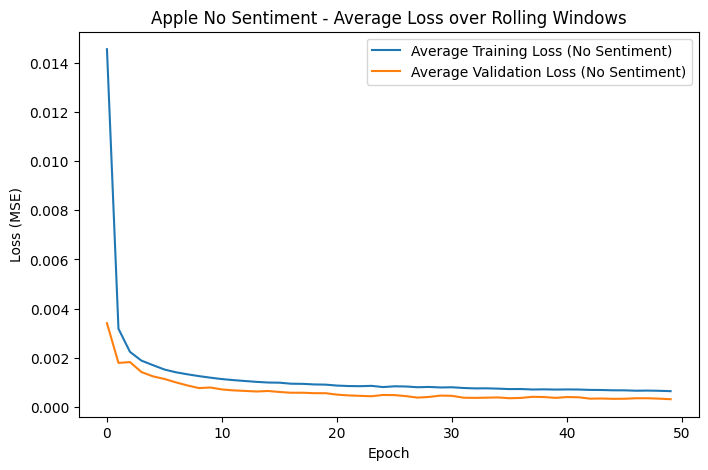

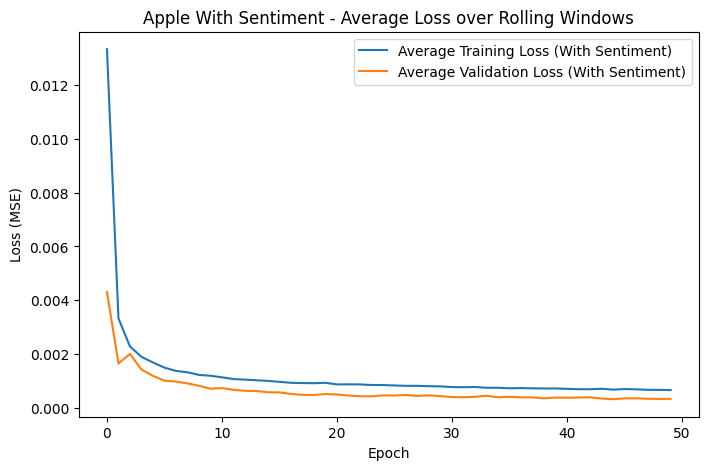


1 Failed download:
['MSFT']: ConnectionError(MaxRetryError("HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Max retries exceeded with url: /v8/finance/chart/MSFT?period1=946702800&period2=1740805200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=zOqrzvnu71D (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x33a52e010>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))"))


ValueError: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by MinMaxScaler.

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
import matplotlib.pyplot as plt

# 결과 저장할 디렉토리 생성 (없으면 생성)
os.makedirs("results", exist_ok=True)

# RMSE, MAE, MAPE 계산 함수 정의
def calculate_rmse(Y_true, Y_pred):
    return np.sqrt(mean_squared_error(Y_true, Y_pred))

def calculate_mae(Y_true, Y_pred):
    return mean_absolute_error(Y_true, Y_pred)

def calculate_mape(Y_true, Y_pred):
    y_true = np.array(Y_true)
    y_pred = np.array(Y_pred)
    y_true_adj = np.where(y_true == 0, 0.001, y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true_adj)) * 100

# 결과 저장을 위한 빈 딕셔너리 초기화
results = {
    'Company': [],
    'RMSE (no sentiment)': [],
    'Accuracy (no sentiment)': [],
    'RMSE (with sentiment)': [],
    'Accuracy (with sentiment)': [],
}

results_file_path = "./results/LSTM_results.csv"
if os.path.isfile(results_file_path):
    existing_results = pd.read_csv(results_file_path)
else:
    existing_results = None

# 여러 종목에 대한 Ticker
stock_dict = {
    "Apple": "AAPL",
    "Microsoft": "MSFT"
}

# 데이터 기간 설정
start_date = "2000-01-01"
end_date   = "2025-03-01"

#----------------------------------------------
# LSTM 윈도우 구성 함수 (target_index를 이용하여 종가만 예측)
#----------------------------------------------
def create_dataset(dataset, seq_size, target_index):
    X, Y = [], []
    for i in range(len(dataset) - seq_size - 1):
        X.append(dataset[i:(i + seq_size)])
        Y.append(dataset[i + seq_size, target_index])
    return np.array(X), np.array(Y)

#----------------------------------------------
# 롤링 윈도우 학습/검증 함수 (개선된 모델 적용)
#----------------------------------------------
def rolling_window_evaluation(X, Y, seq_size, columns, epochs=50, batch_size=32,
                              train_window=500, test_window=100, threshold=0.05):
    total_samples = len(X)
    metrics_list = []  # 각 윈도우의 (rmse, mae, mape, accuracy)
    history_list = []  # 각 윈도우의 history.history (loss, val_loss)
    
    for start in range(0, total_samples - train_window - test_window + 1, test_window):
        X_train = X[start: start + train_window]
        Y_train = Y[start: start + train_window]
        X_test  = X[start + train_window: start + train_window + test_window]
        Y_test  = Y[start + train_window: start + train_window + test_window]
        
        # 개선된 모델: Bidirectional LSTM(64) → Dropout → LSTM(32) → Dropout → Dense(1)
        model = Sequential([
            Input(shape=(seq_size, len(columns))),
            Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=l2(1e-5))),
            Dropout(0.2),
            LSTM(32, return_sequences=False, kernel_regularizer=l2(1e-5)),
            Dropout(0.2),
            Dense(1)
        ])
        model.compile(optimizer='adam', loss='mean_squared_error')
        
        # 학습률 스케줄러
        def scheduler(epoch, lr):
            return lr * 0.99
        lr_callback = LearningRateScheduler(scheduler)

        history = model.fit(
            X_train, Y_train,
            validation_data=(X_test, Y_test),
            epochs=epochs, batch_size=batch_size,
            callbacks=[lr_callback],  # EarlyStopping 제거
            verbose=0
        )
        history_list.append(history.history)
        
        predictions = model.predict(X_test)
        rmse_val = calculate_rmse(Y_test, predictions)
        mae_val  = calculate_mae(Y_test, predictions)
        mape_val = calculate_mape(Y_test, predictions)
        relative_errors = np.abs((Y_test - predictions) / np.where(Y_test==0, 0.001, Y_test))
        accuracy = np.mean(relative_errors < threshold) * 100
        metrics_list.append((rmse_val, mae_val, mape_val, accuracy))
    return metrics_list, history_list

#----------------------------------------------
# 각 종목별로 Rolling Window 방식으로 학습/예측 수행 (종가 예측용)
#----------------------------------------------
# 예측 대상: 종가 ("Close") → No Sentiment에서는 ['Open','High','Low','Close','Volume']에서 Close는 인덱스 3  
# With Sentiment의 경우에도 동일하게, ['Open','High','Low','Close','Volume','Sentiment']에서 Close는 인덱스 3
target_index = 3

for company_name, company_code in stock_dict.items():
    # 1) "No Sentiment": 야후 파이낸스 데이터만
    df_no_sentiment = yf.download(company_code, start=start_date, end=end_date, progress=False)
    df_no_sentiment.reset_index(inplace=True)
    df_no_sentiment = df_no_sentiment[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
    df_no_sentiment.ffill(inplace=True)
    
    # 2) "With Sentiment": 0으로 고정된 컬럼 추가
    df_with_sentiment = df_no_sentiment.copy()
    df_with_sentiment["Sentiment"] = 0.0

    seq_size = 10

    # --- No Sentiment 케이스 ---
data_no_sentiment = df_no_sentiment.iloc[:, 1:].values.astype(float)
scaler_no_sentiment = MinMaxScaler(feature_range=(0, 1))

try:
    scaled_data_no_sentiment = scaler_no_sentiment.fit_transform(data_no_sentiment)
    X_no, Y_no = create_dataset(scaled_data_no_sentiment, seq_size, target_index)
    metrics_no, history_no = rolling_window_evaluation(X_no, Y_no, seq_size, columns_no_sentiment,
                                                       epochs=50, batch_size=32,
                                                       train_window=500, test_window=100, threshold=0.05)
    avg_rmse_no = np.mean([m[0] for m in metrics_no])
    avg_accuracy_no = np.mean([m[3] for m in metrics_no])
except ValueError:
    print(f"{company_name} — No Sentiment 데이터 부족, NaN으로 채움")
    avg_rmse_no = np.nan
    avg_accuracy_no = np.nan

# --- With Sentiment 케이스 ---
data_with_sentiment = df_with_sentiment.iloc[:, 1:].values.astype(float)
scaler_with_sentiment = MinMaxScaler(feature_range=(0, 1))

try:
    scaled_data_with_sentiment = scaler_with_sentiment.fit_transform(data_with_sentiment)
    X_with, Y_with = create_dataset(scaled_data_with_sentiment, seq_size, target_index)
    metrics_with, history_with = rolling_window_evaluation(X_with, Y_with, seq_size, columns_with_sentiment,
                                                           epochs=50, batch_size=32,
                                                           train_window=500, test_window=100, threshold=0.05)
    avg_rmse_with = np.mean([m[0] for m in metrics_with])
    avg_accuracy_with = np.mean([m[3] for m in metrics_with])
except ValueError:
    print(f"{company_name} — With Sentiment 데이터 부족, NaN으로 채움")
    avg_rmse_with = np.nan
    avg_accuracy_with = np.nan

# 결과 저장
results['Company'].append(company_code)
results['RMSE (no sentiment)'].append(avg_rmse_no)
results['Accuracy (no sentiment)'].append(avg_accuracy_no)
results['RMSE (with sentiment)'].append(avg_rmse_with)
results['Accuracy (with sentiment)'].append(avg_accuracy_with)
    
    # ----- 추가: 각 케이스의 모든 윈도우에서의 Loss 곡선 평균 시각화 -----
    # No Sentiment 케이스 loss 평균 계산
    train_losses_no = np.array([h['loss'] for h in history_no])
    val_losses_no = np.array([h['val_loss'] for h in history_no])
    avg_train_loss_no = np.mean(train_losses_no, axis=0)
    avg_val_loss_no = np.mean(val_losses_no, axis=0)
    
    plt.figure(figsize=(8, 5))
    plt.plot(avg_train_loss_no, label='Average Training Loss (No Sentiment)')
    plt.plot(avg_val_loss_no, label='Average Validation Loss (No Sentiment)')
    plt.xlabel("Epoch")
    plt.ylabel("Loss (MSE)")
    plt.title(f"{company_name} No Sentiment - Average Loss over Rolling Windows")
    plt.legend()
    plt.show()
    
    # With Sentiment 케이스 loss 평균 계산
    train_losses_with = np.array([h['loss'] for h in history_with])
    val_losses_with = np.array([h['val_loss'] for h in history_with])
    avg_train_loss_with = np.mean(train_losses_with, axis=0)
    avg_val_loss_with = np.mean(val_losses_with, axis=0)
    
    plt.figure(figsize=(8, 5))
    plt.plot(avg_train_loss_with, label='Average Training Loss (With Sentiment)')
    plt.plot(avg_val_loss_with, label='Average Validation Loss (With Sentiment)')
    plt.xlabel("Epoch")
    plt.ylabel("Loss (MSE)")
    plt.title(f"{company_name} With Sentiment - Average Loss over Rolling Windows")
    plt.legend()
    plt.show()

df_results = pd.DataFrame(results)
df_results.to_csv(results_file_path, index=False)
print("\nFinal Results:")
print(df_results)

To improve accuracy

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 

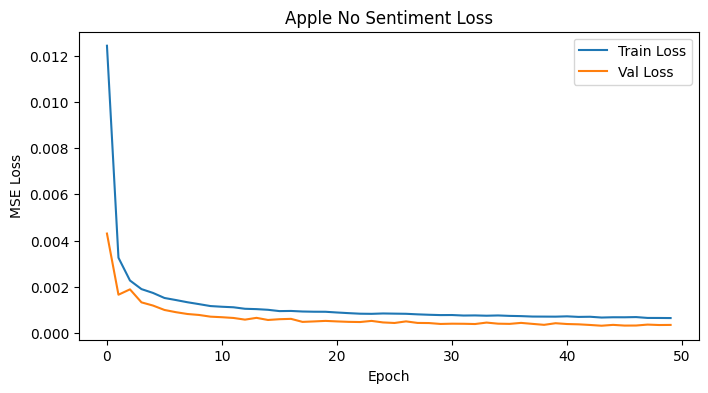

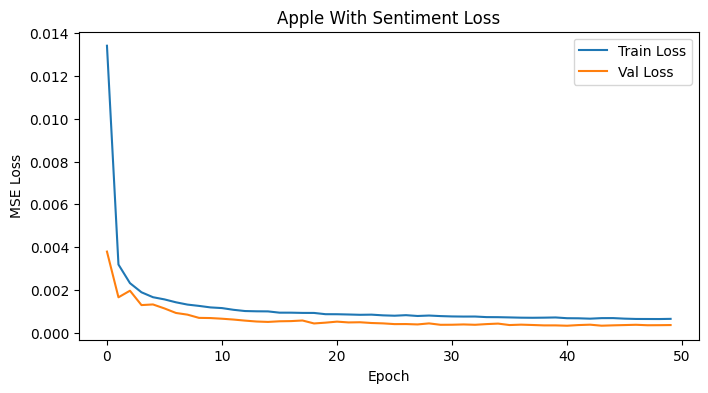

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 9

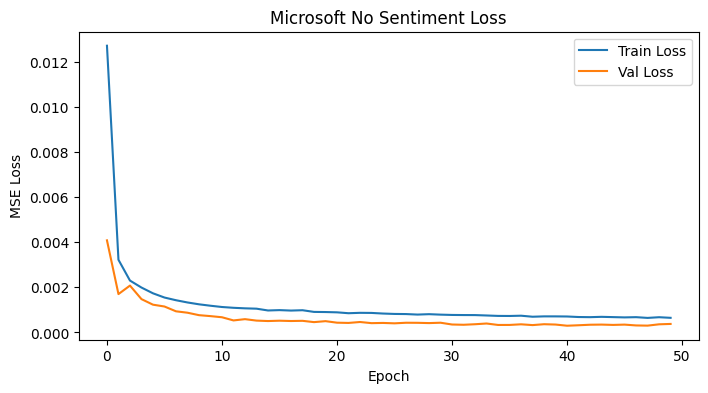

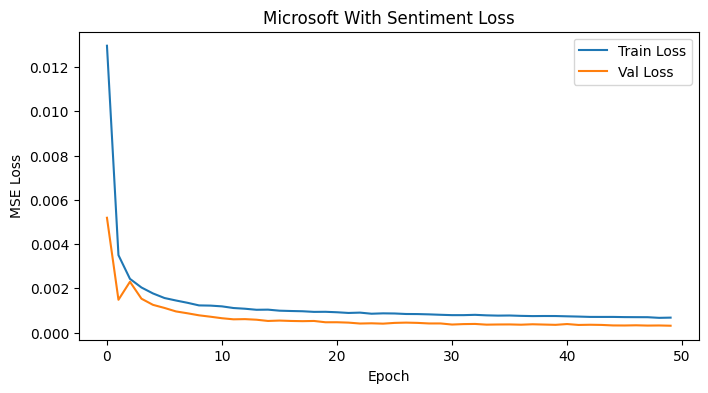


Final Results:
  Company  RMSE (no sentiment)  Accuracy (no sentiment)  \
0    AAPL             0.006889                35.355000   
1    MSFT             0.007408                33.637759   

   RMSE (with sentiment)  Accuracy (with sentiment)  
0               0.007310                  34.205345  
1               0.006569                  34.348793  


In [33]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt

# 결과 저장 디렉토리 생성
os.makedirs("results", exist_ok=True)

# 평가 함수
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def calculate_mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

def calculate_mape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_true_adj = np.where(y_true == 0, 0.001, y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true_adj)) * 100

# 시퀀스 생성
def create_dataset(data, seq_size, target_idx):
    X, Y = [], []
    for i in range(len(data) - seq_size - 1):
        X.append(data[i:i+seq_size])
        Y.append(data[i+seq_size, target_idx])
    return np.array(X), np.array(Y)

# Rolling window 평가
def rolling_window_evaluation(X, Y, seq_size, columns, epochs=50, batch_size=32,
                              train_window=500, test_window=100, threshold=0.05):
    metrics, histories = [], []
    for start in range(0, len(X) - train_window - test_window + 1, test_window):
        X_tr, Y_tr = X[start:start+train_window], Y[start:start+train_window]
        X_te, Y_te = X[start+train_window:start+train_window+test_window], Y[start+train_window:start+train_window+test_window]

        model = Sequential([
            Input(shape=(seq_size, len(columns))),
            Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=l2(1e-5))),
            Dropout(0.2),
            LSTM(32, kernel_regularizer=l2(1e-5)),
            Dropout(0.2),
            Dense(1)
        ])
        model.compile(optimizer='adam', loss='mean_squared_error')

        def scheduler(epoch, lr): return lr * 0.99
        lr_cb = LearningRateScheduler(scheduler)

        history = model.fit(X_tr, Y_tr,
                            validation_data=(X_te, Y_te),
                            epochs=epochs, batch_size=batch_size,
                            callbacks=[lr_cb],
                            verbose=0)
        histories.append(history.history)

        preds = model.predict(X_te)
        rmse = calculate_rmse(Y_te, preds)
        accuracy = np.mean(np.abs((Y_te - preds) / np.where(Y_te==0,1e-3,Y_te)) < threshold) * 100
        metrics.append((rmse, accuracy))
    return metrics, histories

# 메인 실행
results = {'Company': [], 'RMSE (no sentiment)': [], 'Accuracy (no sentiment)': [],
           'RMSE (with sentiment)': [], 'Accuracy (with sentiment)': []}
target_idx = 3  # 'Close'

for name, ticker in {"Apple":"AAPL","Microsoft":"MSFT"}.items():
    df = yf.download(ticker, start="2000-01-01", end="2025-03-01", progress=False)
    df.reset_index(inplace=True)
    df = df[['Date','Open','High','Low','Close','Volume']].ffill()

    # No sentiment
    data_no = df.iloc[:,1:].values.astype(float)
    try:
        scaled_no = MinMaxScaler().fit_transform(data_no)
        X_no, Y_no = create_dataset(scaled_no, seq_size=10, target_idx=target_idx)
        metrics_no, hist_no = rolling_window_evaluation(X_no, Y_no, seq_size=10, columns=df.columns[1:])
        rmse_no = np.mean([m[0] for m in metrics_no]); acc_no = np.mean([m[1] for m in metrics_no])
    except ValueError:
        rmse_no = np.nan; acc_no = np.nan

    # With sentiment (0)
    df_with = df.copy(); df_with['Sentiment'] = 0.0
    data_with = df_with.iloc[:,1:].values.astype(float)
    try:
        scaled_with = MinMaxScaler().fit_transform(data_with)
        X_with, Y_with = create_dataset(scaled_with, seq_size=10, target_idx=target_idx)
        metrics_with, hist_with = rolling_window_evaluation(X_with, Y_with, seq_size=10, columns=df_with.columns[1:])
        rmse_with = np.mean([m[0] for m in metrics_with]); acc_with = np.mean([m[1] for m in metrics_with])
    except ValueError:
        rmse_with = np.nan; acc_with = np.nan

    print(f"{name}: NoSent RMSE={rmse_no:.4f}, Acc={acc_no:.2f}% | WithSent RMSE={rmse_with:.4f}, Acc={acc_with:.2f}%")

    results['Company'].append(ticker)
    results['RMSE (no sentiment)'].append(rmse_no)
    results['Accuracy (no sentiment)'].append(acc_no)
    results['RMSE (with sentiment)'].append(rmse_with)
    results['Accuracy (with sentiment)'].append(acc_with)

    # 평균 Loss 시각화
    def plot_avg_loss(histories, title):
        max_ep = max(len(h['loss']) for h in histories)
        avg_train, avg_val = [], []
        for i in range(max_ep):
            train_vals = [h['loss'][i] for h in histories if len(h['loss'])>i]
            val_vals   = [h['val_loss'][i] for h in histories if len(h['val_loss'])>i]
            avg_train.append(np.mean(train_vals)); avg_val.append(np.mean(val_vals))
        plt.figure(figsize=(8,4))
        plt.plot(avg_train, label='Train Loss'); plt.plot(avg_val, label='Val Loss')
        plt.title(title); plt.xlabel('Epoch'); plt.ylabel('MSE Loss'); plt.legend(); plt.show()

    if 'hist_no' in locals(): plot_avg_loss(hist_no, f"{name} No Sentiment Loss")
    if 'hist_with' in locals(): plot_avg_loss(hist_with, f"{name} With Sentiment Loss")

df_results = pd.DataFrame(results)
df_results.to_csv(results_file_path, index=False)
print("\nFinal Results:")
print(df_results)